In [1]:
import warnings
warnings.filterwarnings("ignore")

import os
import shutil
import glob

In [2]:
source_folder = "/Users/hrushikeshnayak/Desktop/assignment/CNN/train"

cat_folder = "/Users/hrushikeshnayak/Desktop/assignment/CNN/Dataset/cats"
dog_folder = "/Users/hrushikeshnayak/Desktop/assignment/CNN/Dataset/dogs"

os.makedirs(cat_folder, exist_ok=True)
os.makedirs(dog_folder, exist_ok=True)
# Loop through the files in the source folder
for filename in os.listdir(source_folder):
    source_path = os.path.join(source_folder, filename)
    if "cat" in filename:
        # If the filename contains "cat," copy it to the cat folder
        destination_path = os.path.join(cat_folder, filename)
        if not os.path.exists(destination_path):  # Check if the file doesn't already exist
            shutil.copy2(source_path, destination_path)
    elif "dog" in filename:
        # If the filename contains "dog," copy it to the dog folder
        destination_path = os.path.join(dog_folder, filename)
        if not os.path.exists(destination_path):  # Check if the file doesn't already exist
            shutil.copy2(source_path, destination_path)

# Your images should now be copied into the cat and dog folders.


In [3]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd

from keras.layers import Dense, Flatten 
from keras.models import Model
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras.preprocessing.image import ImageDataGenerator

In [4]:
base_model = InceptionV3(input_shape = (256, 256 , 3) , include_top = False)

In [5]:
# Create an instance of the InceptionV3 model
base_model = InceptionV3(input_shape=(256, 256, 3), include_top=False)

# Freeze the layers of the InceptionV3 model
for layer in base_model.layers:
    layer.trainable = False

# Add your custom layers on top of the InceptionV3 model
x = Flatten()(base_model.output)
x = Dense(units=2, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=x)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [6]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d_94 (Conv2D)          (None, 127, 127, 32)         864       ['input_2[0][0]']             
                                                                                                  
 batch_normalization_94 (Ba  (None, 127, 127, 32)         96        ['conv2d_94[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_94 (Activation)  (None, 127, 127, 32)         0         ['batch_normalization_94[0

In [7]:
train_datasen = ImageDataGenerator(featurewise_center=True , rotation_range=0.4 , width_shift_range= 0.3 , horizontal_flip=True , preprocessing_function=preprocess_input , zoom_range= 0.4 , shear_range=0.4)

train_data = train_datasen.flow_from_directory(directory='/Users/hrushikeshnayak/Desktop/assignment/CNN/Dataset' , target_size=(256 , 256) , batch_size=64)


Found 25000 images belonging to 2 classes.


In [8]:
train_data.class_indices

{'cats': 0, 'dogs': 1}

In [9]:
t_img , label = train_data.next()

In [10]:
t_img.shape

(64, 256, 256, 3)

In [11]:
def plotImage(img_arr , label):
    for idx , img in enumerate(img_arr):
        if idx <= 10:
            plt.figure(figsize=(5,5))
            plt.imshow(img)
            plt.title(img.shape)
            plt.axis = False
            plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


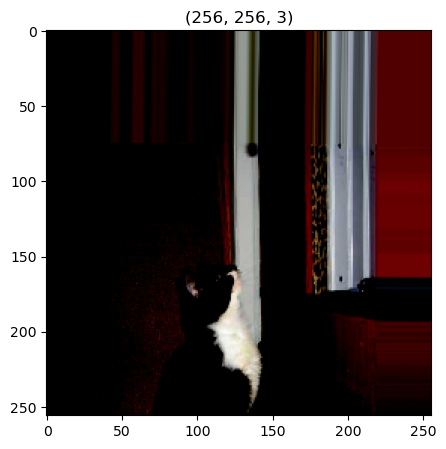

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


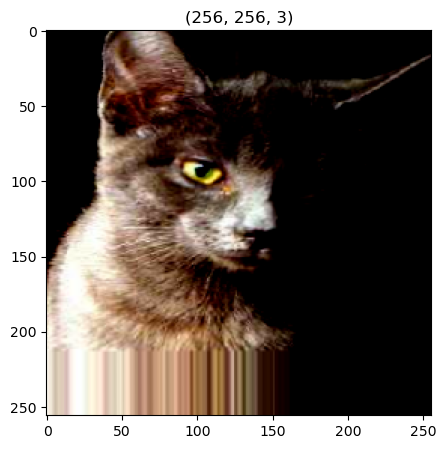

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


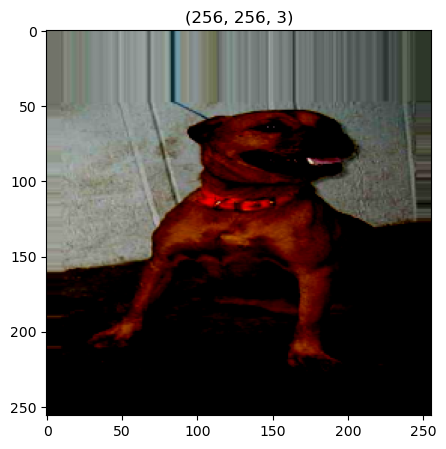

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


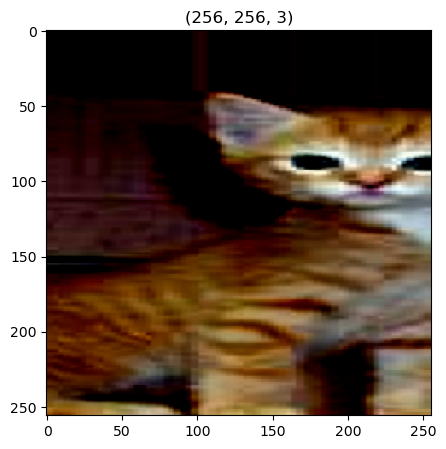

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


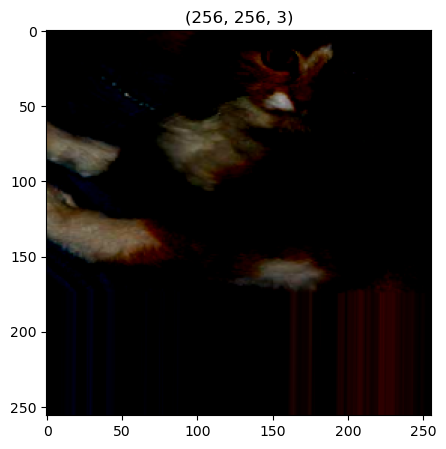

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


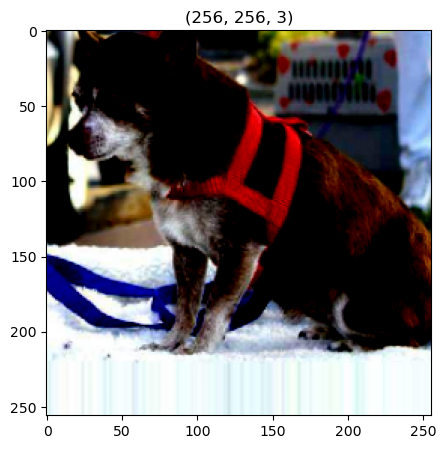

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


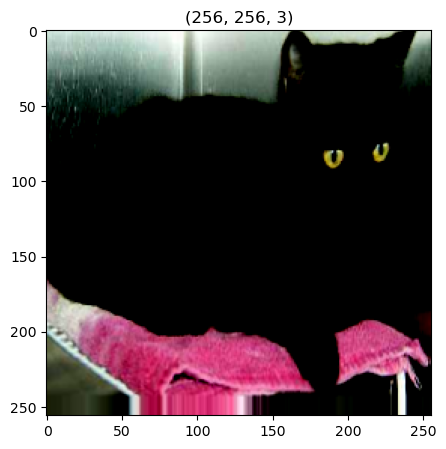

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


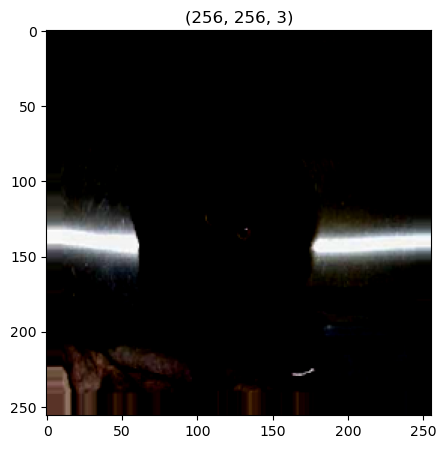

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


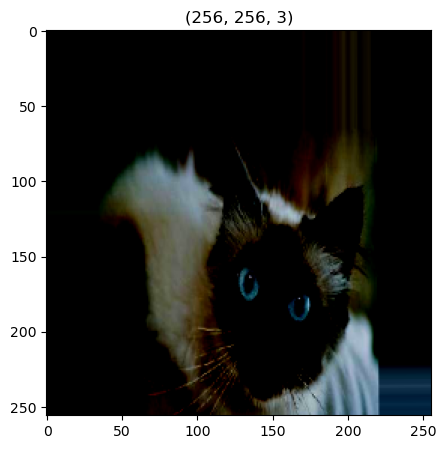

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


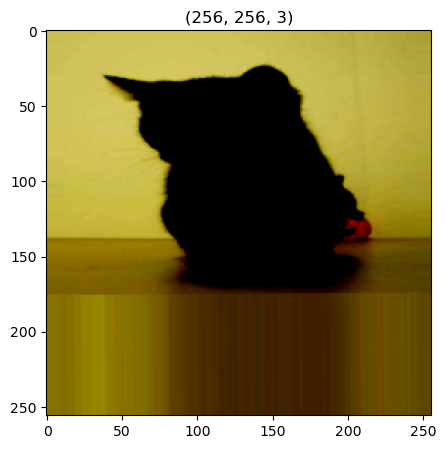

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


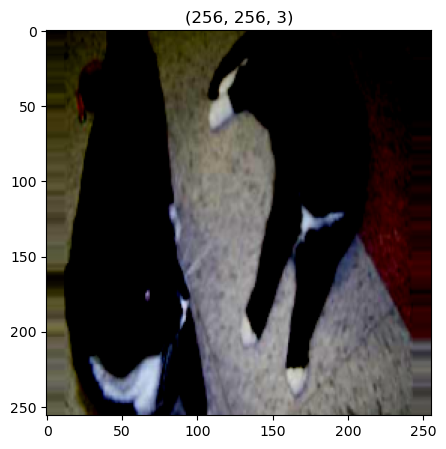

In [12]:
plotImage(t_img , label)

In [21]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

# Define ModelCheckpoint callback to save the best model
mc = ModelCheckpoint(filepath="/Users/hrushikeshnayak/Desktop/assignment/CNN/best_model.h5",
                     monitor="accuracy",
                     verbose=1,
                     save_best_only=True)

# Define EarlyStopping callback to stop training if a condition is met
es = EarlyStopping(monitor="accuracy",
                   min_delta=0.01,
                   patience=5,
                   verbose=1)

# Create a list of callbacks to be used during model training
cb = [mc, es]


In [22]:
his = model.fit_generator(train_data, steps_per_epoch= 10 , epochs= 30, callbacks= cb)

Epoch 1/30
10/10 [==============================] - ETA: 0s - loss: 0.1420 - accuracy: 0.9828
Epoch 1: accuracy improved from -inf to 0.98281, saving model to /Users/hrushikeshnayak/Desktop/assignment/CNN/best_model.h5
10/10 [==============================] - 22s 2s/step - loss: 0.1420 - accuracy: 0.9828
Epoch 2/30
10/10 [==============================] - ETA: 0s - loss: 0.2558 - accuracy: 0.9781
Epoch 2: accuracy did not improve from 0.98281
10/10 [==============================] - 23s 2s/step - loss: 0.2558 - accuracy: 0.9781
Epoch 3/30
10/10 [==============================] - ETA: 0s - loss: 0.1831 - accuracy: 0.9750
Epoch 3: accuracy did not improve from 0.98281
10/10 [==============================] - 25s 2s/step - loss: 0.1831 - accuracy: 0.9750
Epoch 4/30
10/10 [==============================] - ETA: 0s - loss: 0.1964 - accuracy: 0.9805
Epoch 4: accuracy did not improve from 0.98281
10/10 [==============================] - 24s 2s/step - loss: 0.1964 - accuracy: 0.9805
Epoch 5/30

In [25]:
from keras.models import load_model
model = load_model("/Users/hrushikeshnayak/Desktop/assignment/CNN/best_model.h5")